## Tesis de Grado Machine Learning

- Alexis Carrera


## Cargar Base De Datos

## Instalar e importar bibliotecas


In [53]:
import pandas as pd

df = pd.read_csv("resultados_sectoriales.csv")


In [54]:
pivot = df.pivot_table(
    index="InferenciaXSector",
    columns="Dataset_Entrenamiento",
    values=["MAE"]
)

print(pivot)


                                        MAE                        
Dataset_Entrenamiento     ConsumerDefensive      SP500 SP500SinTech
InferenciaXSector                                                  
basic-materials                    1.774678   1.435468     1.822714
communication-services            28.962909  29.238991    26.352639
consumer-cyclical                 11.779530  12.735753     8.262800
consumer-cyclical-no-tech          1.090000   0.700000     0.860000
consumer-defensive                 4.241698   3.759301     5.110052
energy                             1.671428   2.147345     1.549303
financial-services                 0.061537   0.687177     0.563990
healthcare                        10.207190  12.253970    11.377883
industrials                        2.963475   3.465090     1.535696
real-estate                        3.441497   0.549512     1.308726
technology                        17.222043  15.237046    12.961380
utilities                          8.154649  10.

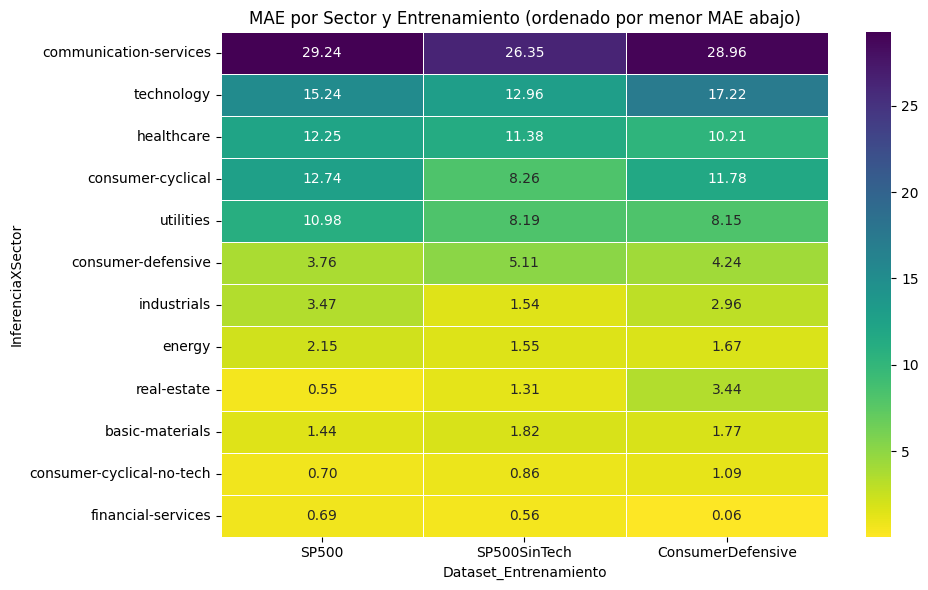

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot base
heat = df.pivot_table(
    index="InferenciaXSector",
    columns="Dataset_Entrenamiento",
    values="MAE"
)

# 1. Calcular el MAE promedio por sector
mae_promedio = heat.mean(axis=1)


# 2. Ordenar sectores del mayor → menor,
#    para que el menor quede ABAJO en el heatmap
heat_sorted = heat.loc[mae_promedio.sort_values(ascending=False).index]

orden_columnas = ["SP500", "SP500SinTech", "ConsumerDefensive"]
heat_sorted = heat_sorted[orden_columnas]

plt.figure(figsize=(10, 6))
sns.heatmap(
    heat_sorted,
    annot=True,
    fmt=".2f",
    cmap="viridis_r",
    linewidths=0.5
)

plt.title("MAE por Sector y Entrenamiento (ordenado por menor MAE abajo)")
plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

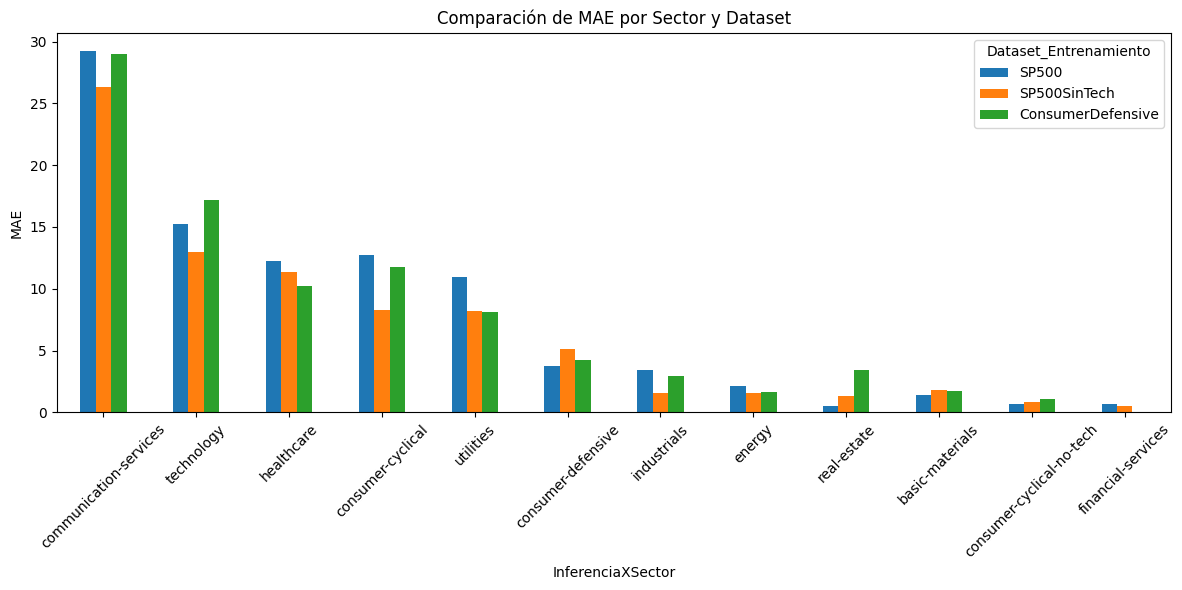

In [ ]:
plt.figure(figsize=(12, 6))
heat_sorted.plot(kind='bar', figsize=(12,6))
plt.ylabel("MAE")
plt.title("Comparación de MAE por Sector y Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
orden_columnas = ["SP500", "SP500SinTech", "ConsumerDefensive"]  # ejemplo